This is a simple example on how you can use a jupyter notebook to train your model :) 

In [1]:
import torch
import torch.nn as nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from models import Task2Model
from plot_utils import create_plots

In [2]:
epochs = 10
batch_size = 64
learning_rate = 1e-2 # Should be 5e-5 for LeNet
early_stop_count = 4
dataloaders = load_cifar10(batch_size)
model = Task2Model(image_channels=3, num_classes=10)
trainer = Trainer(
    batch_size,
    learning_rate,
    early_stop_count,
    epochs,
    model,
    dataloaders
)
trainer.train()

Files already downloaded and verified
Files already downloaded and verified
Task2Model(
  (feature_extractor): Sequential(
    (0): Conv2d(3, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(32, 64, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(64, 128, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2048, out_features=64, bias=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=10, bias=True)
  )
)
Epoch: 0, Batches per seconds: 69.31, Global step:    351, Validation Loss: 2.02, Validation Accuracy: 0.261
Epoch: 0, Batches per sec

### Task 2a
Plot training loss and validation accuracy

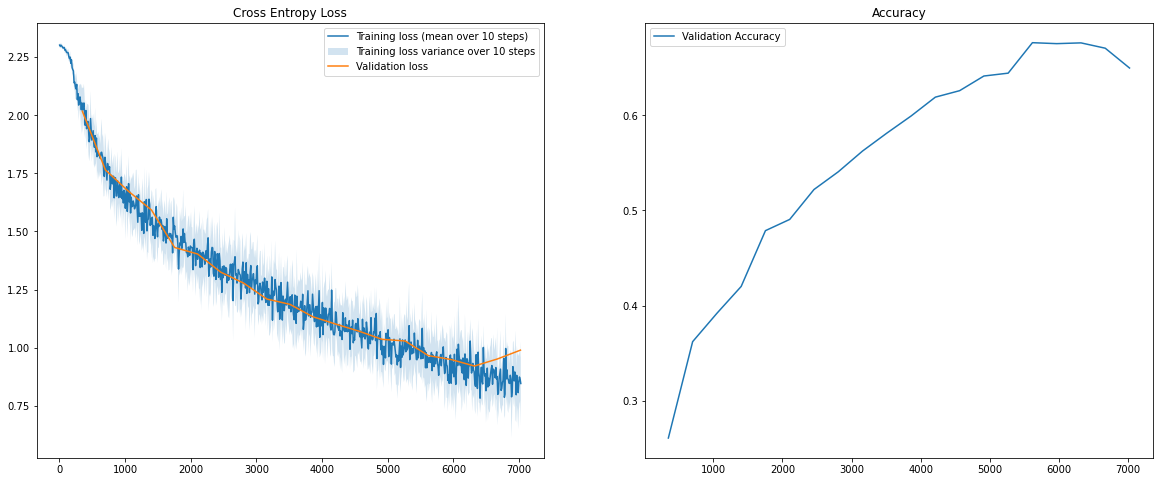

In [3]:
create_plots(trainer, "task2")

### Task 2b
Calculate accuracy over training, test and validation

In [4]:
_, final_train_accuracy = compute_loss_and_accuracy(trainer.dataloader_train, trainer.model, trainer.loss_criterion)
_, final_val_accuracy = compute_loss_and_accuracy(trainer.dataloader_val, trainer.model, trainer.loss_criterion)
_, final_test_accuracy = compute_loss_and_accuracy(trainer.dataloader_test, trainer.model, trainer.loss_criterion)
print(f"Train Accuracy: {final_train_accuracy:.3f}, Test Accuracy: {final_test_accuracy:.3f}, Validation Accuracy: {final_val_accuracy:.3f}")

Train Accuracy: 0.721, Test Accuracy: 0.679, Validation Accuracy: 0.684


### Parameters
I want to confirm the parameters from task 1g, where I got 390410 parameters.

In [5]:
pytorch_total_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
print(f"Num params: {pytorch_total_params}")

Num params: 390410
